# Passive Aggressive Model on another dataset

With kaggle news as train set, instagram posts as test set.

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [112]:
df = pd.read_csv('fakenews_train.csv')

In [113]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [119]:
df.groupby('label').count()

,id,title,author,text
label,,,,
0,10387,10387,10361,10387
1,10413,10413,8482,10413


In [181]:
df1 = pd.read_csv('main_df2.csv')
df1['label']=df1['is_fake']
df1.drop("is_fake",axis=1,inplace=True)
df1.drop(df1[(df1['preprocessed_caption'].str.len() < 45) & (df1['label']==0)].index, inplace=True)
df1.drop(df1[(df1['preprocessed_caption'].str.len() < 45) & (df1['label']==1)].index, inplace=True)

X_r=df1[(df1['preprocessed_caption'].str.len() >100) & (df1['label']==0)].sample(n=1000,random_state=42)
X_f=df1[(df1['label']==1)]

joined_df = X_r.append(X_f, ignore_index=False)

#Randomizing the entries
df1 = joined_df.sample(frac=1, random_state=42)
df1.drop("media_url",axis=1,inplace=True)
df1.dropna(inplace=True)


In [183]:
df['text'].fillna('', inplace=True)
df1['preprocessed_caption'].fillna('', inplace=True)

# Prepare the training data from main_df
X_train = df['text']
y_train = df['label']

# Prepare the testing data from main_df2
X_test = df1['preprocessed_caption']
y_test = df1['label']

In [184]:
100-len(X_test)/len(X_train)*100

92.94711538461539

In [185]:


# Initialize and fit the vectorizer using the training data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9294)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize and train the model using the training data
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)



PassiveAggressiveClassifier(max_iter=50)

In [186]:
# Make predictions on the testing data
y_pred = pac.predict(tfidf_test)

# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', round(score * 100, 2))


Model Accuracy: 45.13


In [187]:
df1

,Unnamed: 0,level_0,index,Unnamed: 0.1,id,permalink,comments_count,like_count,media_type,timestamp,caption,actual_text,hashtags,is_english,english_caption,preprocessed_caption,label
2878,2878,7746,7746,7746,18364561678024572,https://www.instagram.com/p/CtUv6N_uz7T/,41.0,525.0,CAROUSEL_ALBUM,2023-06-10T21:01:39+0000,#News #Sports #CL onefootball\n____\n//// Disc...,onefootball ____ //// Disclaimer: 'This is a B...,#News #Sports #CL,1,onefootball ____ is a does not own any conten...,onefootball ____ content posted unless otherwi...,0
8500,8500,186583,38302,38302,17977408445148213,https://www.instagram.com/p/CtxdvsGN2fu/,51.0,2816.0,IMAGE,2023-06-22T00:40:55+0000,"I'd be absolutely livid 😡 She ought to, though...","I'd be absolutely livid 😡 She ought to, though...",#conservative #trump #maga #republican #donald...,1,"be absolutely livid She ought to, though that...","absolutely livid ought , though mean county sh...",1
3221,3221,8665,8665,8665,17902217150728754,https://www.instagram.com/p/CtUjmQkv9S1/,0.0,3.0,IMAGE,2023-06-10T19:14:04+0000,Congratulations to juharintanen for winning hi...,Congratulations to juharintanen for winning hi...,#driftenthusiastmag #driftenthusiast #drifting...,1,Congratulations to juharintanen for winning h...,congratulation juharintanen winning first ever...,0
1899,1899,5309,5309,5309,17852948807985657,https://www.instagram.com/p/CtVXmo5ISqi/,0.0,0.0,CAROUSEL_ALBUM,2023-06-11T02:48:31+0000,Boom 💥 Boom 💥 Boom\n\nWhatsApp or Call📲📞 +1931...,Boom 💥 Boom 💥 Boom WhatsApp or Call📲📞 +1931269...,#DagensBet #BonusLink #SpilXperten #SpilXBonus...,1,Boom Boom Boom WhatsApp or fixed games were w...,boom boom boom whatsapp fixed game expected co...,0
209,209,614,614,614,18038036413483052,https://www.instagram.com/reel/CtWKnV9OO6-/,0.0,4597.0,VIDEO,2023-06-11T10:17:25+0000,News Divine - June episode is available now on...,News Divine - June episode is available now on...,#news #divine #oneness #humanness #socialwelfa...,1,News Divine June episode is available now on ...,news divine june episode available official yo...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,5967,60745,688,682,18224181487228093,https://www.instagram.com/reel/Ct1CoQiSQ5i/,0.0,0.0,VIDEO,2023-06-23T10:01:18+0000,Johor Darul Ta'zim (5-0) Penang FC | FA QF | H...,Johor Darul Ta'zim (5-0) Penang FC | FA QF | H...,#DemiLigaKita #PialaFA2023 #thenewsnetwork #ne...,1,Johor Darul Penang FC FA QF Highlights Piala ...,johor darul penang fc fa qf highlight piala fa...,0
7664,7664,82299,443,443,17982580733273533,https://www.instagram.com/reel/Ctt4PW0MQxE/,1.0,5.0,VIDEO,2023-06-20T15:16:16+0000,The Truth of why Jesus Points to his Heart 🫀☝️...,The Truth of why Jesus Points to his Heart 🫀☝️...,#faithandbased #spirituality #bible #inspirati...,1,The Truth of why Jesus Points to his Heart Th...,truth jesus point heart truth jesus depicted p...,1
7718,7718,126985,79,79,17993196556890399,https://www.instagram.com/p/Ct1C7KFMOPn/,4.0,283.0,CAROUSEL_ALBUM,2023-06-23T10:03:30+0000,A gory video is viral on social media with the...,A gory video is viral on social media with the...,#altnews #factcheck #altnewsfactcheck #fakenew...,1,A gory video is viral on social media with th...,gory video viral social medium claim muslim ma...,1
2082,2082,5822,5822,5822,17911478471770399,https://www.instagram.com/p/CtVPlMvtfC5/,0.0,0.0,CAROUSEL_ALBUM,2023-06-11T01:38:24+0000,"#Zeus now! Babe, kimkardashian, I know #love #...","now! Babe, kimkardashian, I know and how it wo...",#Zeus #love #works #BlackMustang #GroundZero #...,1,"Babe, kimkardashian, I know and how it at you...","babe , kimkardashian , know fit confirmed , th...",0


In [188]:
results_df= pd.DataFrame(y_test)
results_df['y_test']=""
results_df['y_test']=results_df['label']
results_df.drop(columns="label", inplace=True)
results_df['y_pred']=y_pred

results_df = results_df.merge(df1, left_index=True, right_index=True, how='inner')


In [189]:
results_df.columns

Index(['y_test', 'y_pred', 'Unnamed: 0', 'level_0', 'index', 'Unnamed: 0.1',
       'id', 'permalink', 'comments_count', 'like_count', 'media_type',
       'timestamp', 'caption', 'actual_text', 'hashtags', 'is_english',
       'english_caption', 'preprocessed_caption', 'label'],
      dtype='object')

In [190]:
results_df[['y_test', 'y_pred', 'label', 'comments_count', 'like_count','preprocessed_caption']]

,y_test,y_pred,label,comments_count,like_count,preprocessed_caption
2878,0,1,0,41.0,525.0,onefootball ____ content posted unless otherwi...
8500,1,0,1,51.0,2816.0,"absolutely livid ought , though mean county sh..."
3221,0,1,0,0.0,3.0,congratulation juharintanen winning first ever...
1899,0,1,0,0.0,0.0,boom boom boom whatsapp fixed game expected co...
209,0,1,0,0.0,4597.0,news divine june episode available official yo...
...,...,...,...,...,...,...
5967,0,1,0,0.0,0.0,johor darul penang fc fa qf highlight piala fa...
7664,1,1,1,1.0,5.0,truth jesus point heart truth jesus depicted p...
7718,1,1,1,4.0,283.0,gory video viral social medium claim muslim ma...
2082,0,1,0,0.0,0.0,"babe , kimkardashian , know fit confirmed , th..."


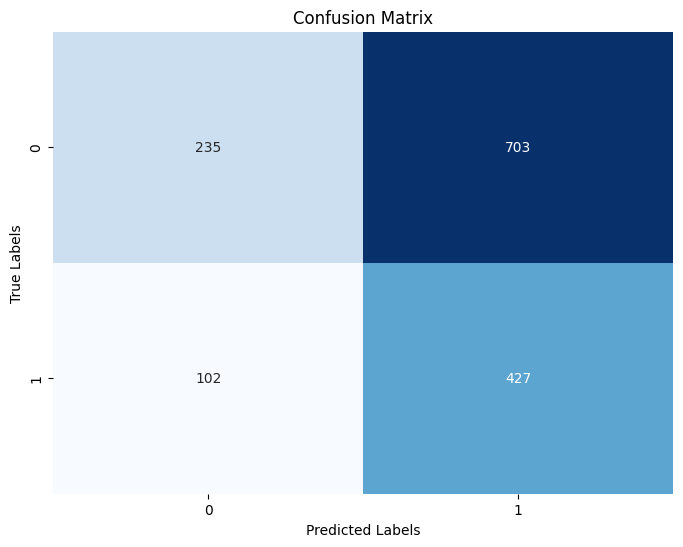

In [191]:
# Calculate the confusion matrix
cm = confusion_matrix(results_df['y_test'], results_df['y_pred'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Selecting true positive instances
true_positive_df = results_df[(results_df['y_test'] == 1) & (results_df['y_test'] == results_df['y_pred'])]



In [192]:
results_df[results_df["y_test"]==results_df["y_pred"]].sort_values("y_test")

,y_test,y_pred,Unnamed: 0,level_0,index,Unnamed: 0.1,id,permalink,comments_count,like_count,media_type,timestamp,caption,actual_text,hashtags,is_english,english_caption,preprocessed_caption,label
484,0,0,484,1426,1426,1426,17951125565501838,https://www.instagram.com/p/CtWDgUNtOrF/,0.0,3.0,IMAGE,2023-06-11T09:12:07+0000,Tesla Inc. has made rapid adjustments to its b...,Tesla Inc. has made rapid adjustments to its b...,#supplychain #administration #tax #tesla #elec...,1,Tesla has made rapid adjustments to its batte...,tesla made rapid adjustment battery supply cha...,0
3463,0,0,3463,9315,9315,9315,18003385072718709,https://www.instagram.com/p/CtUdJGVNDRt/,0.0,0.0,IMAGE,2023-06-10T18:17:40+0000,"In the latest update on Hajj arrangements, on ...","In the latest update on Hajj arrangements, on ...",#paknews#news#newstoday,1,"In the latest update on Hajj arrangements, on...","latest update hajj arrangement , friday evenin...",0
3857,0,0,3857,10326,10326,10326,17922504731721127,https://www.instagram.com/p/CtUUg3xv_cY/,0.0,10.0,IMAGE,2023-06-10T17:02:16+0000,"On a cumulative basis, all 24 players register...","On a cumulative basis, all 24 players register...",#insurance #lifeinsurance #company #lic #news ...,1,"On a cumulative basis, all 24 players registe...","cumulative basis , 24 player registered 15 per...",0
3554,0,0,3554,9544,9544,9544,17992804105969066,https://www.instagram.com/p/CtUbI2MPpCL/,1.0,0.0,IMAGE,2023-06-10T18:00:12+0000,A small Florida town in Miami-Dade County has ...,A small Florida town in Miami-Dade County has ...,#PrideMonth #Surfside #LGBTQ #LGBTQ #lgbtqnews...,1,A small Florida town in County has defied its...,small florida town county defied wish celebrat...,0
2154,0,0,2154,5987,5987,5987,18006579610693632,https://www.instagram.com/p/CtVNE3TuQWm/,1.0,43.0,IMAGE,2023-06-11T01:16:31+0000,😲😲😲🫣🫣 ST. GABRIEL - The cousin of New Orleans ...,😲😲😲🫣🫣 ST. GABRIEL - The cousin of New Orleans ...,#louisiana #news #viral #reels #neworleans,1,GABRIEL The cousin of New Orleans kingpin Tel...,gabriel cousin new orleans kingpin telly hankt...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,1,1,7598,82074,218,218,18266315053147364,https://www.instagram.com/p/Ctux6_hudO7/,0.0,1.0,IMAGE,2023-06-20T23:39:30+0000,"6/17/23 It Doesn't Matter...\nPraise God, Sain...","6/17/23 It Doesn't Matter... Praise God, Saint...","#presidenttrump,#trumpnews,#trumpraid,#prayfor...",1,"It Praise God, I hear Regardless of what they...","praise god , hear regardless say , trust sayin...",1
8269,1,1,8269,131682,1672,1672,18371176009054812,https://www.instagram.com/p/CttOxiDIgfv/,0.0,17.0,IMAGE,2023-06-20T09:13:08+0000,As we mark #Pride2023 #Pride we hear from Eger...,"As we mark we hear from Egerton Neto, Programm...",#Pride2023 #Pride #misinformation #pridemonth ...,1,"As we mark we hear from Egerton Neto, Program...","mark hear egerton neto , programme manager , p...",1
8481,1,1,8481,150427,2146,2146,18182598292254383,https://www.instagram.com/p/Cqwy2z8vwJd/,9.0,832.0,IMAGE,2023-04-08T04:51:58+0000,Minister of state for electronics and IT Rajee...,Minister of state for electronics and IT Rajee...,#rajeevchandrasekhar #ITRules #fakenews #newsl...,1,Minister of state for electronics and IT Raje...,minister state electronics rajeev chandrasekha...,1
7690,1,1,7690,105756,23900,23900,17992840603997906,https://www.instagram.com/p/CtwJtH6O_F4/,0.0,0.0,IMAGE,2023-06-21T12:26:33+0000,jobefilms19 ⚠️ #Ian Messiah LouisFarrakhan is ...,jobefilms19 ⚠️ Messiah LouisFarrakhan is The O...,#Ian #Allah #MasterFardMuhammad #MotherShip. #...,1,jobefilms19 Messiah LouisFarrakhan is The ONL...,jobefilms19 messiah louisfarrakhan reason brou...,1


In [193]:
import requests
import json

def FactCheck(query):
    payload = {
    'key': 'ENTER_API_KEY',
    'query':query
    }
    url ='https://factchecktools.googleapis.com/v1alpha1/claims:search'
    response = requests.get(url,params=payload)
    print(response)
    if response.status_code == 200:
        result = json.loads(response.text)
        # Arbitrarily select 1
        try:
            topRating = result["claims"][0]
            # arbitrarily select top 1
            claimReview = topRating["claimReview"][0]["textualRating"]
            claimVal = "According to " + str(topRating["claimReview"][0]['publisher']['name'])+ " that claim is " + str(claimReview)
            print(result)
            return claimVal           
        except Exception as e:
            print("No claim review field found.")
            print(e)
            return 0
    else:
        return 0
results_df['fact_check']=""
results_df.reset_index(drop=True,inplace=True)

In [202]:
for row in range(len(results_df)):
    results_df['fact_check'][row]=FactCheck(results_df['english_caption'][row])

'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<Response [200]>
No claim review field found.
'claims'
<

In [203]:
results_df[results_df["fact_check"]!=0]

,y_test,y_pred,Unnamed: 0,level_0,index,Unnamed: 0.1,id,permalink,comments_count,like_count,media_type,timestamp,caption,actual_text,hashtags,is_english,english_caption,preprocessed_caption,label,fact_check
239,1,1,7966,130226,216,216,18292660903117064,https://www.instagram.com/p/CtyPdKVIQI5/,4.0,756.0,IMAGE,2023-06-22T07:55:17+0000,#WebQoof | Social media users shared several o...,| Social media users shared several old and un...,#WebQoof #FactCheck #FakeNews #Viral #Kuki #Me...,1,Social media users shared several old and unr...,social medium user shared several old unrelate...,1,According to The Quint that claim is False
287,1,1,7998,130372,362,362,18064221169403640,https://www.instagram.com/p/CtdfVy_SzjD/,33.0,1785.0,IMAGE,2023-06-14T06:30:02+0000,#WebQoof | A viral video of the Karnataka foot...,| A viral video of the Karnataka football team...,#WebQoof #Football #Karnataka #Bangalore #Karn...,1,A viral video of the Karnataka football team ...,viral video karnataka football team waiting ou...,1,According to The Quint that claim is False
563,1,1,8408,132285,2275,2275,17987897854806990,https://www.instagram.com/p/CpFVCJJpx3e/,38.0,2029.0,IMAGE,2023-02-25T11:12:38+0000,#WebQoof | An edited video of Bollywood actor ...,| An edited video of Bollywood actor with her ...,#WebQoof #AishwaryaRaiBachchan #FactCheck #Mis...,1,An edited video of Bollywood actor with her d...,"edited video bollywood actor daughter , aaradh...",1,According to The Quint that claim is False
574,1,0,8366,132132,2122,2122,18016819558550275,https://www.instagram.com/p/CqfeG2uhCKn/,159.0,5806.0,IMAGE,2023-04-01T11:23:34+0000,A viral graphic claiming that Delhi Public Sch...,A viral graphic claiming that Delhi Public Sch...,#FakeNews #Debunk #Viral #Goa #DPS #DelhiPubli...,1,A viral graphic claiming that Delhi Public Sc...,viral graphic claiming delhi public school goa...,1,According to The Quint that claim is False
597,1,1,8179,131263,1253,1253,17849887715961654,https://www.instagram.com/p/CsYx37Zyj6f/,12.0,1472.0,IMAGE,2023-05-18T14:04:23+0000,#WebQoof | A false claim about BJP losing 58 o...,| A false claim about BJP losing 58 or 41 seat...,#WebQoof #Karnataka #FakeNews #Misinformation,1,A false claim about BJP losing 58 or 41 seats...,false claim bjp losing 58 41 seat karnataka el...,1,According to BOOM FactCheck that claim is False
735,1,1,8248,131608,1598,1598,18208472188235356,https://www.instagram.com/p/Co7ZpDoLbGi/,118.0,3034.0,IMAGE,2023-02-21T14:40:30+0000,The claim is misleading as the movie didn't wi...,The claim is misleading as the movie didn't wi...,#DadaSahebPhalkeAward #DadaSahebInternationalF...,1,The claim is misleading as the movie win the ...,claim misleading movie win dada saheb phalke a...,1,According to The Quint that claim is False
1186,1,0,8129,130969,959,959,17918605829708329,https://www.instagram.com/p/CryOwfHBogF/,6.0,577.0,IMAGE,2023-05-03T14:46:24+0000,#WebQoof | A viral photo of a plane on the oce...,| A viral photo of a plane on the ocean floor ...,#WebQoof #FakeNews #MalaysiaAirlines #Misinfor...,1,A viral photo of a plane on the ocean floor i...,viral photo plane ocean floor shared false cla...,1,According to The Quint that claim is False


In [163]:
results_df[results_df["fact_check"]!=0]

,y_test,y_pred,Unnamed: 0,level_0,index,Unnamed: 0.1,id,permalink,comments_count,like_count,...,media_url,timestamp,caption,actual_text,hashtags,is_english,english_caption,preprocessed_caption,label,fact_check
262,1,1,7966,130226,216,216,18292660903117064,https://www.instagram.com/p/CtyPdKVIQI5/,4.0,756.0,...,https://scontent-iad3-1.cdninstagram.com/v/t51...,2023-06-22T07:55:17+0000,#WebQoof | Social media users shared several o...,| Social media users shared several old and un...,#WebQoof #FactCheck #FakeNews #Viral #Kuki #Me...,1,Social media users shared several old and unr...,social medium user shared several old unrelate...,1,According to The Quint that claim is False
316,1,1,7998,130372,362,362,18064221169403640,https://www.instagram.com/p/CtdfVy_SzjD/,33.0,1785.0,...,https://scontent-iad3-1.cdninstagram.com/v/t51...,2023-06-14T06:30:02+0000,#WebQoof | A viral video of the Karnataka foot...,| A viral video of the Karnataka football team...,#WebQoof #Football #Karnataka #Bangalore #Karn...,1,A viral video of the Karnataka football team ...,viral video karnataka football team waiting ou...,1,According to The Quint that claim is False
533,1,1,7720,127003,97,97,18006487078773354,https://www.instagram.com/reel/Ct0-F3MgiQU/,0.0,7.0,...,https://scontent-iad3-2.cdninstagram.com/o1/v/...,2023-06-23T09:24:19+0000,"What is ""Yellow Journalism""\n #yellowjournalis...","What is ""Yellow Journalism"" 😊",#yellowjournalism #fakenews #fakejournalism #f...,1,What is,,1,According to Full Fact that claim is This is c...
538,1,1,8368,132134,2124,2124,17984868233146972,https://www.instagram.com/p/Cs_9_S-Of6z/,19.0,446.0,...,https://scontent-iad3-1.cdninstagram.com/v/t51...,2023-06-02T19:20:38+0000,THOUGHTS?\n.\n.\n.\n.\n.\n.\n.\n.\n#truth #tru...,THOUGHTS? . . . . . . . .,#truth #trudeau #consciousness #lgbt #biden #g...,1,NaN,,1,According to Boatos.org that claim is Falso
548,1,1,8298,131839,1829,1829,17913070685656825,https://www.instagram.com/p/CrqoB0mu_fh/,34.0,291.0,...,https://scontent-iad3-2.cdninstagram.com/v/t51...,2023-04-30T15:53:18+0000,Source⁉️⁉️\n\n🤡\n\n🤡\n\n#bozopilled #basedddd ...,Source⁉️⁉️ 🤡 🤡,#bozopilled #basedddd #based #basedmemes #fake...,1,NaN,,1,According to PolitiFact that claim is False
606,1,1,7857,127667,761,761,17942789162535282,https://www.instagram.com/reel/Cty4S0rMGx4/,0.0,9.0,...,https://scontent-iad3-2.cdninstagram.com/o1/v/...,2023-06-22T13:53:11+0000,#Politics #democrats #republican #gop #mueller...,and,#Politics #democrats #republican #gop #mueller...,1,and,,1,According to FactCheck.org that claim is We Re...
620,1,1,8408,132285,2275,2275,17987897854806990,https://www.instagram.com/p/CpFVCJJpx3e/,38.0,2029.0,...,https://scontent-iad3-1.cdninstagram.com/v/t51...,2023-02-25T11:12:38+0000,#WebQoof | An edited video of Bollywood actor ...,| An edited video of Bollywood actor with her ...,#WebQoof #AishwaryaRaiBachchan #FactCheck #Mis...,1,An edited video of Bollywood actor with her d...,"edited video bollywood actor daughter , aaradh...",1,According to The Quint that claim is False
636,1,0,8366,132132,2122,2122,18016819558550275,https://www.instagram.com/p/CqfeG2uhCKn/,159.0,5806.0,...,https://scontent-iad3-1.cdninstagram.com/v/t39...,2023-04-01T11:23:34+0000,A viral graphic claiming that Delhi Public Sch...,A viral graphic claiming that Delhi Public Sch...,#FakeNews #Debunk #Viral #Goa #DPS #DelhiPubli...,1,A viral graphic claiming that Delhi Public Sc...,viral graphic claiming delhi public school goa...,1,According to The Quint that claim is False
661,1,1,8179,131263,1253,1253,17849887715961654,https://www.instagram.com/p/CsYx37Zyj6f/,12.0,1472.0,...,https://scontent-iad3-1.cdninstagram.com/v/t51...,2023-05-18T14:04:23+0000,#WebQoof | A false claim about BJP losing 58 o...,| A false claim about BJP losing 58 or 41 seat...,#WebQoof #Karnataka #FakeNews #Misinformation,1,A false claim about BJP losing 58 or 41 seats...,false claim bjp losing 58 41 seat karnataka el...,1,According to The Quint that claim is Fa

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c8af7b1-f3b8-45ab-bbdc-6a32713107d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>